## Content Table

 1-Walker Basic Info Table
 
 
 2- Walker Basic Cohort Table
 
 
 3- Walker Service Behaviour Analysis Eda

# 1-Walker Basic Info Table

In [1]:
import numpy as np # numerical python
import pandas as pd # data processing
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
#Today is: 2/26/2021

Pandas version: 1.5.3
Numpy version: 1.24.3


In [2]:
demands = pd.read_csv("data/demands.csv")
walkers = pd.read_csv("data/walkers.csv")
#walkers2 = pd.read_excel("data/walkers.xlsx")
walks = pd.read_csv("data/walks.csv")

demands.head(3)

,orderid,walkerid,demandtime,dogid,finishedservicecount,finishedservicecountbydogid,ispreferred,matchingid,ownerid,servicetype,walkerdistrict,walkerneighborhood,walkerdograteresponse,walkergeo,walkergroup,walkerrateresponse
0,e44b27ec-2acb-4254-a9b4-b24bd0da7d8c,29b62d7f-61bf-4622-bd2c-af5044a398b5,2020-08-25 16:22:25.397,9dc9b910-4d9e-4d8d-acc1-2c7b36974cfa,78,2,False,31b72223-3855-49fc-a958-8e955e1c61d4,43b72967-b365-4d81-a283-4f77c5662f68,AdHoc,Kadıköy,Caferağa,"(0.0, 0)","(40.98659, 29.02385)",TypeC,"(5.0, 1)"
1,bbfece32-244a-4ed0-acf2-51c7ec3cb347,e8220c30-3470-44af-b7e3-3f2a063e6ecf,2020-07-29 19:57:53.518,9fa36b2d-2097-4bdd-9fe6-8742d93fbbb3,1,0,NaN,a5d2ba0c-f41f-411b-a4be-c466a99ad182,ea27cea2-0876-41bc-b8e8-5af5402b34a7,Planned,Maltepe,Çınar,"(0.0, 0)","(40.94159, 29.11359)",TypeB,"(0.0, 0)"
2,f00deb24-46a8-453d-b4a0-a82cfb960467,ff665506-7322-4fcf-adef-0fdc52a8bd71,2020-08-25 14:33:12.169,f4cd7324-c9e3-423e-a96f-d402320cfd4b,399,327,False,040c77e6-dd7b-4c9b-b45b-f42727f9e134,d2d61ca7-be5d-4a2d-a6e5-75a75aa42a19,Planned,Sarıyer,NaN,"(5.0, 63)","(41.17616, 29.06476)",TypeC,"(5.0, 64)"


In [3]:
walks.head(3)

,Unnamed: 0,ownerid,walkid,walkerid,walkingid,dogid,walkingtype,duration,checkintime,distance,district,neighborhood,endtime,Unnamed: 13,Unnamed: 14
0,0,eefa1cdf-041b-4738-a0f5-6e6647b28b1a,fdb4fdd3-19b7-4176-a2ee-817eeaba4f4d,09e59ced-1172-4744-a2bb-eb68ae83041c,e5b70802-a457-472a-9852-cba0889ef85a,1e68f0a4-101d-44fb-b9d6-add3277f1277,Customize,45,2019-12-06 7:00:00,2.826252,Beşiktaş,NaN,2019-12-06 8:06:07,NaN,1129.0
1,1,b8ed3dd3-8a62-4189-85ee-b224913c64d6,e02af026-f364-40c4-9483-0adb4e449ed2,6007a0a8-d40b-4560-9ead-180c1646dae5,0d1f6547-7f63-4231-ace7-b23692102b70,fe49e24b-87ee-4512-b9e5-880e61021617,Customize,45,2020-03-03 7:30:00,1.241175,Kadıköy,NaN,2020-03-03 8:22:12,NaN,NaN
2,2,64a2b80f-9648-452a-acb2-22abe358f859,5ca5bac6-0f62-473d-8552-39d49a4a1fd8,13d7d39f-4c27-446f-85a2-ce747ee07bee,8bb4eb44-eb70-4882-865d-d8deb9fd7555,94a3a9ba-e8ba-41d5-86e8-d72435d48b82,Customize,45,2020-10-20 6:30:00,2.562674,Beşiktaş,NaN,2020-10-20 7:14:49,NaN,NaN


In [4]:
df = pd.DataFrame(walkers, columns=['id', 'totalWalks', 'firstWalk', 'lastWalk', 'signuptime', 'didDemandOrWalk', 'lifetime',
                                   'averageLifetime','averageWalk','firstWalkAfterSignup','firstWalkinWeek','lastMonthWalks',
                                   'activityTag','differentDistrictCount','activeLifeTime','totalActiveDayCount','walkFrequency',
                                   'dailyWalkAverage','walksWithNoDemands','totalDemandCount','last30DaysDemandCount','weeklyAverageDemandCount']) 

In [5]:
walkers.id.nunique()

730

In [6]:
df.rename(columns = {'id':'walkerid'}, inplace = True) 
df.head(3)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaN,NaN,2019-11-03 22:01:38.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaN,NaN,2020-02-11 15:30:28.371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaN,NaN,2019-11-06 09:47:58.777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#totalwalks
totalWalks = pd.DataFrame(walks.groupby('walkerid')['walkingid'].count().reset_index())
totalWalks.rename(columns = {'walkingid':'totalWalks'}, inplace = True)
totalWalks.head(3)

,walkerid,totalWalks
0,00162fd3-21b4-4371-bebe-db6b081d86ef,6
1,0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1,5
2,00fef613-662c-4194-8de1-164942e25fb2,8


In [8]:
 for index, row in df.iterrows():
    if pd.isna(row['totalWalks']):  # Check if B value is NaN
        corresponding_b = totalWalks.loc[totalWalks['walkerid'] == row['walkerid'], 'totalWalks'].values
        if len(corresponding_b) > 0:  # Check if a corresponding B value exists in df2
            df.at[index, 'totalWalks'] = corresponding_b[0]
df.head(3)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaN,NaN,2019-11-03 22:01:38.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaN,NaN,2020-02-11 15:30:28.371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaN,NaN,2019-11-06 09:47:58.777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#firstwalk
firstwalk = pd.DataFrame(walks.groupby('walkerid')['checkintime'].min().reset_index())
for index, row in df.iterrows():
    if pd.isna(row['firstWalk']):  # Check if B value is NaN
        corresponding_b = firstwalk.loc[firstwalk['walkerid'] == row['walkerid'], 'checkintime'].values
        if len(corresponding_b) > 0:  # Check if a corresponding B value exists in df2
            df.at[index, 'firstWalk'] = corresponding_b[0]
df.head(3)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaN,NaN,2019-11-03 22:01:38.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaN,NaN,2020-02-11 15:30:28.371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaN,NaN,2019-11-06 09:47:58.777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#lastwalk
lastwalk = pd.DataFrame(walks.groupby('walkerid')['checkintime'].max().reset_index())
for index, row in df.iterrows():
    if pd.isna(row['lastWalk']):  # Check if B value is NaN
        corresponding_b = lastwalk.loc[lastwalk['walkerid'] == row['walkerid'], 'checkintime'].values
        if len(corresponding_b) > 0:  # Check if a corresponding B value exists in df2
            df.at[index, 'lastWalk'] = corresponding_b[0]
df.head(3)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaN,NaN,2019-11-03 22:01:38.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaN,NaN,2020-02-11 15:30:28.371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaN,NaN,2019-11-06 09:47:58.777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#didDemandOrWalk 
didDemandOrWalk = pd.DataFrame(demands.groupby('walkerid')['demandtime'].count().reset_index())
didDemandOrWalk["demandtime"] = "Yes"
didDemandOrWalk2 = pd.DataFrame(walks.groupby('walkerid')['checkintime'].count().reset_index())
didDemandOrWalk2["checkintime"] = "Yes"
didDemandOrWalk2.rename(columns = {'checkintime':'demandtime'}, inplace = True) 

In [12]:
frames = [didDemandOrWalk, didDemandOrWalk2]
 
didDemandOrWalk = pd.concat(frames)
didDemandOrWalk.drop_duplicates()
didDemandOrWalk.head(3)

,walkerid,demandtime
0,00162fd3-21b4-4371-bebe-db6b081d86ef,Yes
1,0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1,Yes
2,00d848ec-bd66-4451-ad25-31a017133f2a,Yes


In [13]:
for index, row in df.iterrows():
    if pd.isna(row['didDemandOrWalk']):  # Check if B value is NaN
        corresponding_b = didDemandOrWalk.loc[didDemandOrWalk['walkerid'] == row['walkerid'], 'demandtime'].values
        if len(corresponding_b) > 0:  # Check if a corresponding B value exists in df2
            df.at[index, 'didDemandOrWalk'] = corresponding_b[0]
df['didDemandOrWalk'] = df['didDemandOrWalk'].fillna("No")
df.head(3)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaN,NaN,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaN,NaN,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaN,NaN,2019-11-06 09:47:58.777,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#lifetime
def days_between(d1, d2):
    if isinstance(d1, str):
        d1 = datetime.strptime(d1.split('.')[0], "%Y-%m-%d %H:%M:%S")
    if isinstance(d2, str):
        d2 = datetime.strptime(d2.split('.')[0], "%Y-%m-%d %H:%M:%S")
    if isinstance(d1, datetime) and isinstance(d2, datetime):
        return abs((d2 - d1).days)
    else:
        return None  # or any default value you prefer

df['lifetime'] = df.apply(lambda row: days_between(row['lastWalk'], row['signuptime']), axis=1)
df.head(3)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaN,NaN,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaN,NaN,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaN,NaN,2019-11-06 09:47:58.777,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#averageLifetime
for i in range(len(df["lifetime"])):
    if df["lifetime"][i]>df["lifetime"].mean():
        df["averageLifetime"][i]="More"
    elif df["lifetime"][i]<df["lifetime"].mean():
        df["averageLifetime"][i]="Less"
df.head(3)

C:\Users\rvent\AppData\Local\Temp\ipykernel_10712\4212031820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["averageLifetime"][i]="More"


,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaN,NaN,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaN,NaN,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaN,NaN,2019-11-06 09:47:58.777,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#averageWalk 
for i in range(len(df["averageWalk"])):
    if df["totalWalks"][i]>df["totalWalks"].mean():
        df["averageWalk"][i]="More"
    elif df["totalWalks"][i]<df["totalWalks"].mean():
        df["averageWalk"][i]="Less"
df.head(3)

C:\Users\rvent\AppData\Local\Temp\ipykernel_10712\1478160085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["averageWalk"][i]="Less"


,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaN,NaN,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaN,NaN,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaN,NaN,2019-11-06 09:47:58.777,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#firstWalkAfterSignup
df['firstWalkAfterSignup'] = df.apply(lambda row: days_between(row['signuptime'], row['firstWalk']), axis=1)
df.head(3)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaN,NaN,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaN,NaN,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaN,NaN,2019-11-06 09:47:58.777,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#firstWalkinWeek
def calculate_first_walk_in_week(row):
  first_walk = pd.to_datetime(row['firstWalk'])
  signup_time = pd.to_datetime(row['signuptime'])
  time_delta = first_walk - signup_time
  return 'Yes' if time_delta.days <= 7 else 'No'

df['firstWalkinWeek'] = df.apply(calculate_first_walk_in_week, axis=1)


df.head(3)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaN,NaN,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaN,NaN,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaN,NaN,2019-11-06 09:47:58.777,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#lastMonthWalks
walks2 = walks.copy()

walks2['endtime'] = pd.to_datetime(walks2['endtime'])
start_date = pd.Timestamp('2021-01-26')
end_date = pd.Timestamp('2021-02-26')

# Filter rows based on the endtime column within the specified date range
walks2 = walks2[walks2['endtime'].between(start_date, end_date)]
walks2.head(3)

,Unnamed: 0,ownerid,walkid,walkerid,walkingid,dogid,walkingtype,duration,checkintime,distance,district,neighborhood,endtime,Unnamed: 13,Unnamed: 14
6,6,eefa1cdf-041b-4738-a0f5-6e6647b28b1a,978a485d-557e-4a1b-b5e9-aaca69b43fcf,fe9073d4-b8f3-4f4e-a9f0-5f9e78a02576,bb3ac89e-e59b-46f7-b1c1-4e5d8254d961,1e68f0a4-101d-44fb-b9d6-add3277f1277,Package,45,2021-02-18 7:00:00,1.340374,Beşiktaş,NaN,2021-02-18 07:25:43,NaN,NaN
39,39,625782eb-a145-4840-9469-2373aa0cf965,681b9e41-0d55-4f1b-bfca-34ffcf576b92,8f9dda8a-e283-4616-bc03-3c0ec1762083,c1e71dd4-0820-48c1-b39f-1a8d760b7a8f,3b4fd5f9-55a5-47dd-9178-9eba62593d1b,Planned,45,2021-02-11 6:30:00,1.907104,Kadıköy,NaN,2021-02-11 07:27:41,NaN,NaN
46,46,09454dfc-489a-4b85-baa7-84e84d2d9332,b9dda9a5-73e6-4180-9fa5-02462b4b5ee0,e874edc8-6411-497f-8098-478e84a58b41,59e71cec-243b-46e4-8c8e-49c20e9fe424,5dfe3962-7cf6-4661-abba-f590db8b4d09,Customize,45,2021-02-08 16:00:00,10.846176,Şişli,Feriköy,2021-02-08 20:09:57,NaN,NaN


In [20]:
lastMonthWalks = pd.DataFrame(walks2.groupby('walkerid')['endtime'].count().reset_index())
lastMonthWalks
for index, row in df.iterrows():
    walkerid = row['walkerid']
    if not pd.isna(walkerid):  # Check if walkerid is not NaN
      corresponding_b = lastMonthWalks.loc[lastMonthWalks['walkerid'] == walkerid, 'endtime'].values
      if len(corresponding_b) > 0:  # Check if a corresponding walkerid exists in lastMonthWalks
        df.at[index, 'lastMonthWalks'] = corresponding_b[0]
df.head(3)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaN,NaN,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaN,NaN,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaN,NaN,2019-11-06 09:47:58.777,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#differentDistrictCount
walks3 = walks.copy()
walks3.drop(walks3.columns[[0,1,2,4,5,6,7,8,9,11,12,13,14]], axis=1, inplace=True)
walks3 = walks3.drop_duplicates()
walks3 =  pd.DataFrame(walks3.groupby('walkerid')["district"].count().reset_index())
walks3.head(5)

,walkerid,district
0,00162fd3-21b4-4371-bebe-db6b081d86ef,1
1,0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1,1
2,00fef613-662c-4194-8de1-164942e25fb2,1
3,01adeee1-cb3d-46ff-9514-f4797299698c,3
4,01b0fb51-4461-4638-95a5-8fc8c0ef1c9d,1


In [22]:
for index, row in df.iterrows():
    if pd.isna(row['differentDistrictCount']):  # Check if B value is NaN
        corresponding_b = walks3.loc[walks3['walkerid'] == row['walkerid'], 'district'].values
        if len(corresponding_b) > 0:  # Check if a corresponding B value exists in df2
            df.at[index, 'differentDistrictCount'] = corresponding_b[0]
df.head(3)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaN,NaN,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaN,NaN,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaN,NaN,2019-11-06 09:47:58.777,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#activeLifeTime
df["lastWalk"] = pd.to_datetime(df["lastWalk"])
df["firstWalk"] = pd.to_datetime(df["firstWalk"])

df["activeLifeTime"] = df["lastWalk"].dt.date - df["firstWalk"].dt.date
df["activeLifeTime"] = df["activeLifeTime"].dt.days 

df.head(3)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaT,NaT,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaT,NaT,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaT,NaT,2019-11-06 09:47:58.777,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#totalActiveDayCount 
walks4 = walks.copy()
walks4.drop(walks4.columns[[0,1,2,4,5,6,7,9,10,11,12,13,14]], axis=1, inplace=True)
walks4["checkintime"] = pd.to_datetime(walks4["checkintime"]).dt.date

walks4 = walks4.drop_duplicates()
walks4 = pd.DataFrame(walks4.groupby('walkerid')['checkintime'].count().reset_index())
walks4.head(2)

,walkerid,checkintime
0,00162fd3-21b4-4371-bebe-db6b081d86ef,5
1,0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1,5


In [25]:
for index, row in df.iterrows():
    if pd.isna(row['totalActiveDayCount']):  # Check if B value is NaN
        corresponding_b = walks4.loc[walks4['walkerid'] == row['walkerid'], 'checkintime'].values
        if len(corresponding_b) > 0:  # Check if a corresponding B value exists in df2
            df.at[index, 'totalActiveDayCount'] = corresponding_b[0]
df.head(2)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaT,NaT,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaT,NaT,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#dailyWalkAverage
df["dailyWalkAverage"] = df["totalWalks"].divide(df["totalActiveDayCount"])
 
df.head(2)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaT,NaT,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaT,NaT,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#walksWithNoDemands
#Yes values are walks with no demands

In [28]:
walks2 = pd.DataFrame(walks["walkerid"])
demands2 = pd.DataFrame(demands["walkerid"])

In [29]:
walks2 = walks2.drop_duplicates()
demands2 = demands2.drop_duplicates()

In [30]:
inner_join = pd.merge(walks2,  
                      demands2,  
                      on ="walkerid",  
                      how ='inner') 
inner_join.head()

,walkerid
0,09e59ced-1172-4744-a2bb-eb68ae83041c
1,6007a0a8-d40b-4560-9ead-180c1646dae5
2,13d7d39f-4c27-446f-85a2-ce747ee07bee
3,d005408b-e621-42f5-ad47-6d05f71812ff
4,da9be347-c2ff-4453-b7db-04fecebcdede


In [31]:
merged_df = pd.merge(walks2,  
                      inner_join,  
                      on ="walkerid",  
                      how ='left', indicator = True) 
dff = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])
dff["walksWithNoDemands"]="Yes"
dff

,walkerid,walksWithNoDemands
7,7f3f00c5-0f59-4e67-b7eb-bf508a19d913,Yes
11,f12c75c0-6895-4322-b771-7e27b0be5448,Yes
17,ae625ba1-2c16-4a3b-a61c-f067a36567b9,Yes
34,724a7e2f-4e64-4828-9654-4fb94d3c6be3,Yes
35,4bccdab7-9c0f-4627-9f44-65dd9679199b,Yes
...,...,...
1120,33c6c19e-e735-444a-bcaf-4914abd7ef41,Yes
1121,9db80134-a7eb-4c85-a6f7-88ddfa3f0da6,Yes
1122,db512508-e038-4e73-b7e2-9b4e681225b1,Yes
1123,c3b07f44-5b82-4877-8c57-3eb35f033fe0,Yes


In [32]:
for index, row in df.iterrows():
    if pd.isna(row['walksWithNoDemands']):  # Check if B value is NaN
        corresponding_b = dff.loc[dff['walkerid'] == row['walkerid'], 'walksWithNoDemands'].values
        if len(corresponding_b) > 0:  # Check if a corresponding B value exists in df2
            df.at[index, 'walksWithNoDemands'] = corresponding_b[0]
df["walksWithNoDemands"] = df["walksWithNoDemands"].fillna("No")

df.head(2)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaT,NaT,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaT,NaT,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN


In [33]:
#totalDemandCount
totalDemandCount= pd.DataFrame(demands.groupby('walkerid')['demandtime'].count().reset_index())
for index, row in df.iterrows():
    if pd.isna(row['totalActiveDayCount']):  # Check if B value is NaN
        corresponding_b = totalDemandCount.loc[totalDemandCount['walkerid'] == row['walkerid'], 'demandtime'].values
        if len(corresponding_b) > 0:  # Check if a corresponding B value exists in df2
            df.at[index, 'totalActiveDayCount'] = corresponding_b[0]
df.head(2)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaT,NaT,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaT,NaT,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN


In [34]:
#last30DaysDemandCount
demands2 = demands.copy()

demands2['demandtime'] = pd.to_datetime(demands2['demandtime'])
start_date = pd.Timestamp('2021-01-26')
end_date = pd.Timestamp('2021-02-26')

# Filter rows based on the endtime column within the specified date range
demands2 = demands2[demands2['demandtime'].between(start_date, end_date)]
demands2.head(3)

,orderid,walkerid,demandtime,dogid,finishedservicecount,finishedservicecountbydogid,ispreferred,matchingid,ownerid,servicetype,walkerdistrict,walkerneighborhood,walkerdograteresponse,walkergeo,walkergroup,walkerrateresponse
6,4da65763-1410-447d-85e0-1c8a360b58f7,cbdf5356-df86-4614-aa16-eae019d05508,2021-02-25 23:52:04.633,0e138307-6dcc-474e-9f44-d00227a5a0a2,712,0,False,f069a511-f129-487f-a89d-8b41c954ffdc,5934d79a-5501-474b-a5f5-de60cfa0ad19,Planned,Üsküdar,Bahçelievler,"(0.0, 0)","(41.06441, 29.08149)",TypeB,"(4.962121212121211, 44)"
7,4da65763-1410-447d-85e0-1c8a360b58f7,0b1aa9c1-ca9c-46d1-b800-94dd3a615f09,2021-02-25 23:28:27.699,0e138307-6dcc-474e-9f44-d00227a5a0a2,4,0,False,a1e8845f-4e05-452c-a1cf-9c48dff252bc,5934d79a-5501-474b-a5f5-de60cfa0ad19,Planned,Kağıthane,Çeliktepe,"(0.0, 0)","(41.08521, 28.99602)",TypeB,"(0.0, 0)"
13,05e7f7c4-8c64-4615-a5bc-d5dd662a533a,f47cb35c-d536-49ea-afdf-94b0c141f436,2021-01-29 13:30:36.790,c669aba0-27dd-47d8-955d-3af57caecb51,36,0,False,42d61b4c-a711-449a-8e59-26406bf9dc5d,c090e9f8-192c-46f3-9f42-8b38f258282a,AdHoc,Kadıköy,Caferağa,"(0.0, 0)","(41.01265, 29.01606)",TypeC,"(5.0, 2)"


In [35]:
last30DaysDemandCount = pd.DataFrame(demands2.groupby('walkerid')['demandtime'].count().reset_index())
for index, row in df.iterrows():
    walkerid = row['walkerid']
    if not pd.isna(walkerid):  # Check if walkerid is not NaN
      corresponding_b = last30DaysDemandCount.loc[last30DaysDemandCount['walkerid'] == walkerid, 'demandtime'].values
      if len(corresponding_b) > 0:  # Check if a corresponding walkerid exists in lastMonthWalks
        df.at[index, 'last30DaysDemandCount'] = corresponding_b[0]
df.head(3)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaT,NaT,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaT,NaT,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
2,d6d71172-a808-420e-9856-3dd0a067318b,NaN,NaT,NaT,2019-11-06 09:47:58.777,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN


In [36]:
#weeklyAverageDemandCount

In [37]:
demands.index= pd.to_datetime(demands.demandtime)

In [38]:
demands.index = pd.to_datetime(demands.index)

In [39]:
weekly_data = demands.resample('W')

In [40]:
weekly_demand=demands.groupby('walkerid').resample('W').size()

In [41]:
weeklyAverageDemandCount = pd.DataFrame(weekly_demand.groupby('walkerid').mean().reset_index())
weeklyAverageDemandCount

,walkerid,0
0,00162fd3-21b4-4371-bebe-db6b081d86ef,0.235294
1,0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1,2.454545
2,00d848ec-bd66-4451-ad25-31a017133f2a,2.000000
3,00e99cd8-9886-4808-8266-7080bcf2ac88,1.500000
4,00fef613-662c-4194-8de1-164942e25fb2,1.666667
...,...,...
954,fe9bd5c2-c7fe-44c5-8013-457d693a3ec1,1.555556
955,febe2751-8999-4f61-8c61-a5108a2981b3,1.777778
956,ff665506-7322-4fcf-adef-0fdc52a8bd71,1.882353
957,ff709292-6ece-4d95-83d1-2b74aee65631,1.571429


In [42]:
weeklyAverageDemandCount = pd.DataFrame(weekly_demand.groupby('walkerid').mean().reset_index())

for index, row in df.iterrows():
    if pd.isna(row['weeklyAverageDemandCount']):  # Check if B value is NaN
        corresponding_b = weeklyAverageDemandCount.loc[weeklyAverageDemandCount['walkerid'] == row['walkerid'], 0].values
        if len(corresponding_b) > 0:  # Check if a corresponding B value exists in df2
            df.at[index, 'weeklyAverageDemandCount'] = corresponding_b[0]
df.head(2)

,walkerid,totalWalks,firstWalk,lastWalk,signuptime,didDemandOrWalk,lifetime,averageLifetime,averageWalk,firstWalkAfterSignup,firstWalkinWeek,lastMonthWalks,activityTag,differentDistrictCount,activeLifeTime,totalActiveDayCount,walkFrequency,dailyWalkAverage,walksWithNoDemands,totalDemandCount,last30DaysDemandCount,weeklyAverageDemandCount
0,248b0c40-6670-47e1-be2d-052934fac3ea,NaN,NaT,NaT,2019-11-03 22:01:38.006,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
1,01029542-74c8-4ba7-9370-c63d0eab244d,NaN,NaT,NaT,2020-02-11 15:30:28.371,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN


# Walker Basic Cohort Table

In [43]:
df['current_month'] = pd.to_datetime(df['firstWalk'])
df['current_month']

0                     NaT
1                     NaT
2                     NaT
3     2020-10-27 15:15:00
4     2020-11-26 08:00:00
              ...        
725                   NaT
726                   NaT
727                   NaT
728   2019-03-12 16:00:00
729                   NaT
Name: current_month, Length: 730, dtype: datetime64[ns]

In [44]:
df["current_month"] = df["current_month"].replace("NaT", '')  # Replace all zeros with empty strings

In [45]:
df['current_month'] = pd.to_datetime(df['current_month'])

In [46]:
df["cohort_month"] = df.groupby("walkerid")["current_month"].transform("min")

In [47]:
def cohort_index(df, col1, col2):

  current_year = pd.to_datetime(df[col1]).dt.year
  current_month = pd.to_datetime(df[col2]).dt.month
  cohort_year = pd.to_datetime(df[col1]).dt.year
  cohort_month = pd.to_datetime(df[col2]).dt.month
  return (current_year - cohort_year) * 12 + current_month - cohort_month

df['cohort_index'] = cohort_index(df, "current_month", "cohort_month")

In [48]:
def months_diff(df, col1, col2):
    current_month = pd.to_datetime(df[col1]).dt.month
    cohort_month = pd.to_datetime(df[col2]).dt.month
    return current_month - cohort_month

df['months_diff'] = months_diff(df, 'current_month', 'cohort_month')

In [49]:
def years_diff(df, col1, col2):
    current_year = pd.to_datetime(df[col1]).dt.year
    cohort_year = pd.to_datetime(df[col2]).dt.year
    return current_year - cohort_year

df['years_diff'] = years_diff(df, 'current_month', 'cohort_month')

In [50]:
def cohort_index(df, col1, col2):
    return df[col1] * 12 + df[col2]

df['cohort_index'] = cohort_index(df, 'years_diff', 'months_diff')

In [51]:
cohort_counts = df.groupby(['cohort_month', 'cohort_index'])['walkerid'].nunique()

cohort_counts_df = cohort_counts.to_frame().rename(columns={'walkerid':'walkerid'}) \
                                .sort_values(by=['cohort_month'])

In [52]:
cohort_counts_df['First Service Count'] = cohort_counts_df['walkerid'] / cohort_counts_df.groupby(["cohort_month"])["walkerid"].transform("max")
cohort_counts_df

,,walkerid,First Service Count
cohort_month,cohort_index,,
2019-01-03 16:00:00,0.0,1,1.0
2019-01-04 06:00:00,0.0,1,1.0
2019-01-05 17:00:00,0.0,1,1.0
2019-01-06 15:00:00,0.0,1,1.0
2019-01-06 16:00:00,0.0,1,1.0
...,...,...,...
2021-02-22 16:00:00,0.0,1,1.0
2021-02-23 06:45:00,0.0,1,1.0
2021-02-23 09:00:00,0.0,1,1.0


In [53]:
cohorts_pivot = cohort_counts_df.pivot_table(index='cohort_month', columns = 'cohort_index', values = 'First Service Count')

<Axes: xlabel='cohort_index', ylabel='cohort_month'>

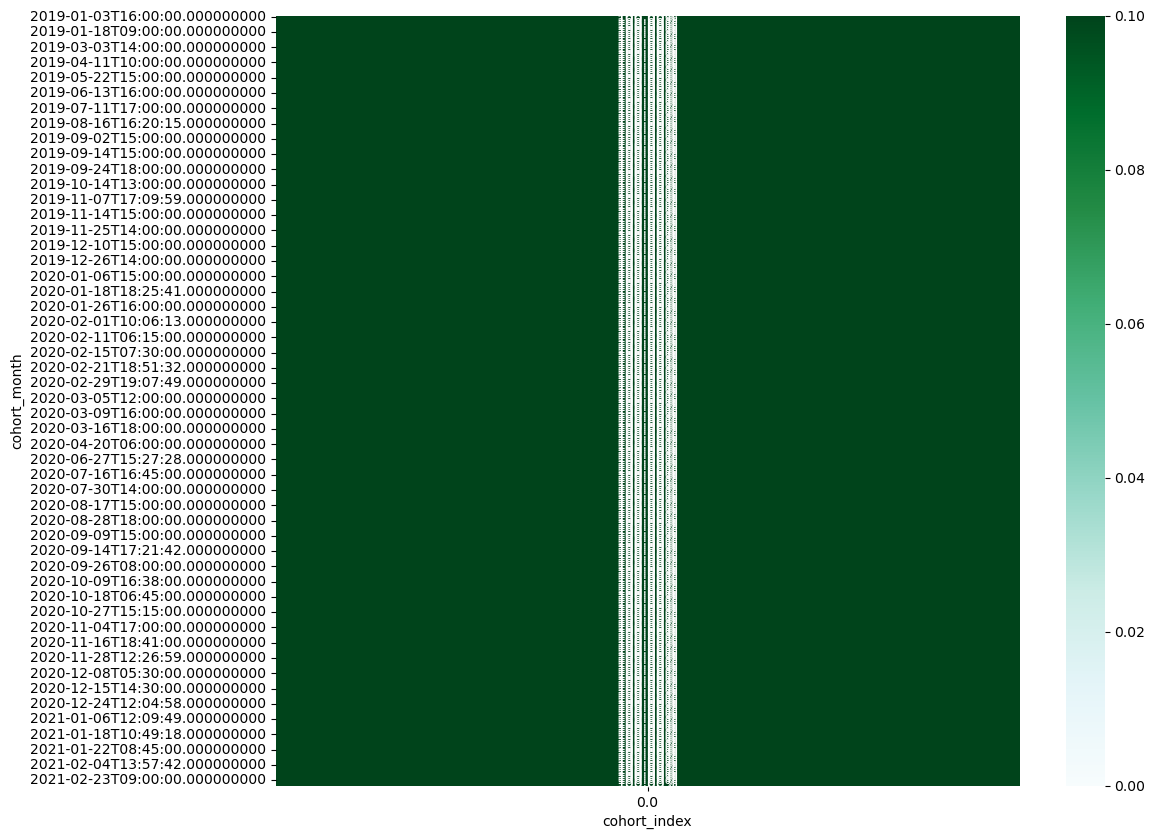

In [54]:
plt.figure(figsize = (12, 10))
sns.heatmap(data = cohorts_pivot,
            annot = True,
            fmt = '.2%',
            vmin = 0.0,
            vmax = 0.1,
            cmap = 'BuGn')

# Walker Service Behaviour Analysis Eda

konumlarda kaç walker hangi aylarda ne kadar konum var ne kadar yoğunluk var

chatgpt ye at analiz önerisi versin
soruları jupytere yazıp düzenleyim.

### iii.	lastWalk 
#### 1.	Last walk date of walker



iv.	signupTime
1.	The date that walker signs up in app
v.	didDemandOrWalk                       
1.	Whether the walker did a walk or demand after his/her signup
2.	Value: Yes/No

In [55]:
#Number of signups per month

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df['signuptime'] = pd.to_datetime(df['signuptime'])

In [58]:
df['month'] = df['signuptime'].dt.month

In [59]:
monthdf = df.groupby('month')["walkerid"].count().reset_index()

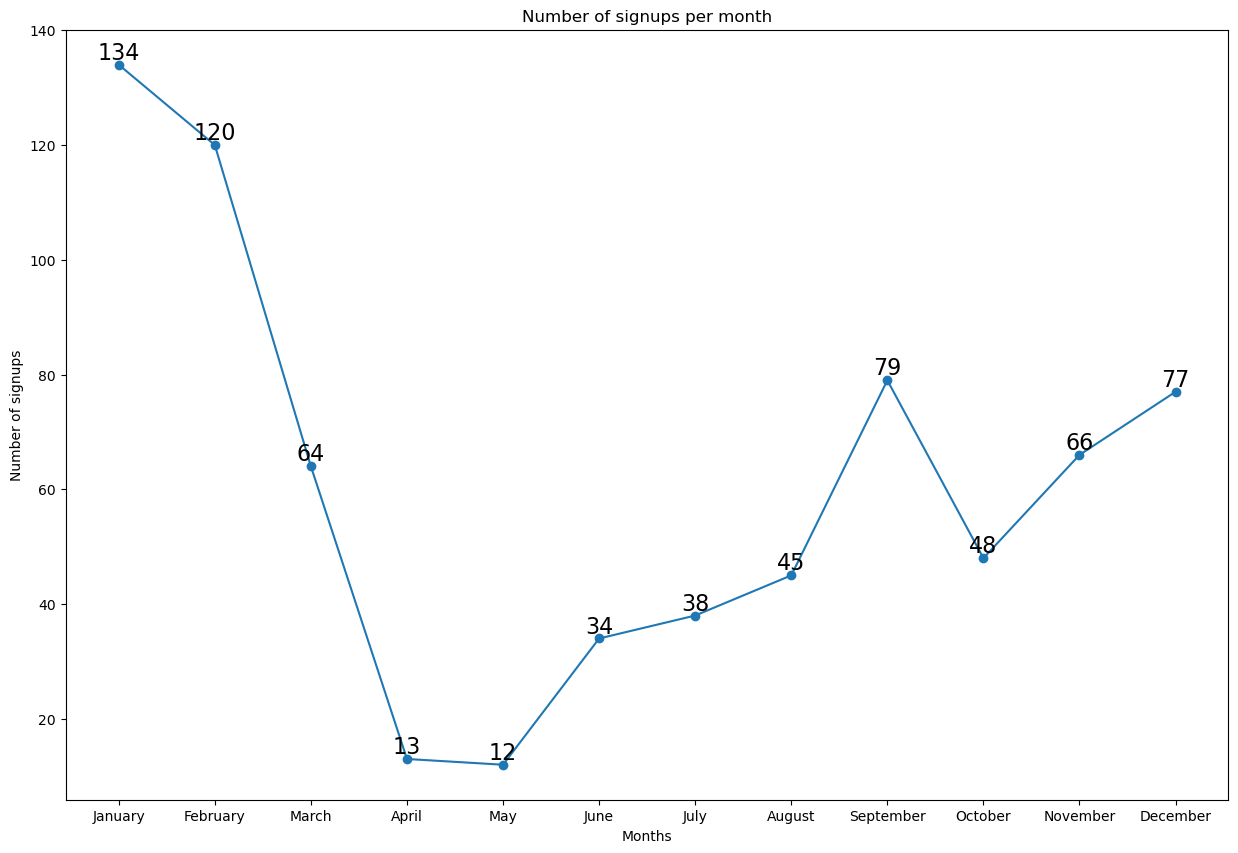

In [60]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(15,10))
plt.plot(df.groupby('month')["walkerid"].count(), marker='o')

# Get x and y data from the plot
x_data = df.groupby('month')['month'].count().index.to_numpy()  # Month labels (x-axis)
y_data = df.groupby('month')["walkerid"].count().to_numpy()  # Signup counts (y-axis)

# Loop through data points and add labels (text) above each marker
for i, (x, y) in enumerate(zip(x_data, y_data)):
  # Adjust y-position slightly for better visibility
  plt.text(x, y + 0.1, str(y), ha='center', va='bottom', fontsize=16)  # Add label with count

plt.xticks(x_data, months)  # Set month labels on x-axis

plt.title("Number of signups per month")
plt.xlabel("Months")
plt.ylabel("Number of signups")

plt.show()


In [61]:
#Number of demands per month

In [62]:
demands['demandtime'] = pd.to_datetime(demands['demandtime'])

In [63]:
demands['month'] = demands['demandtime'].dt.month

In [64]:
df.groupby('month')['month'].count().index.to_numpy()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

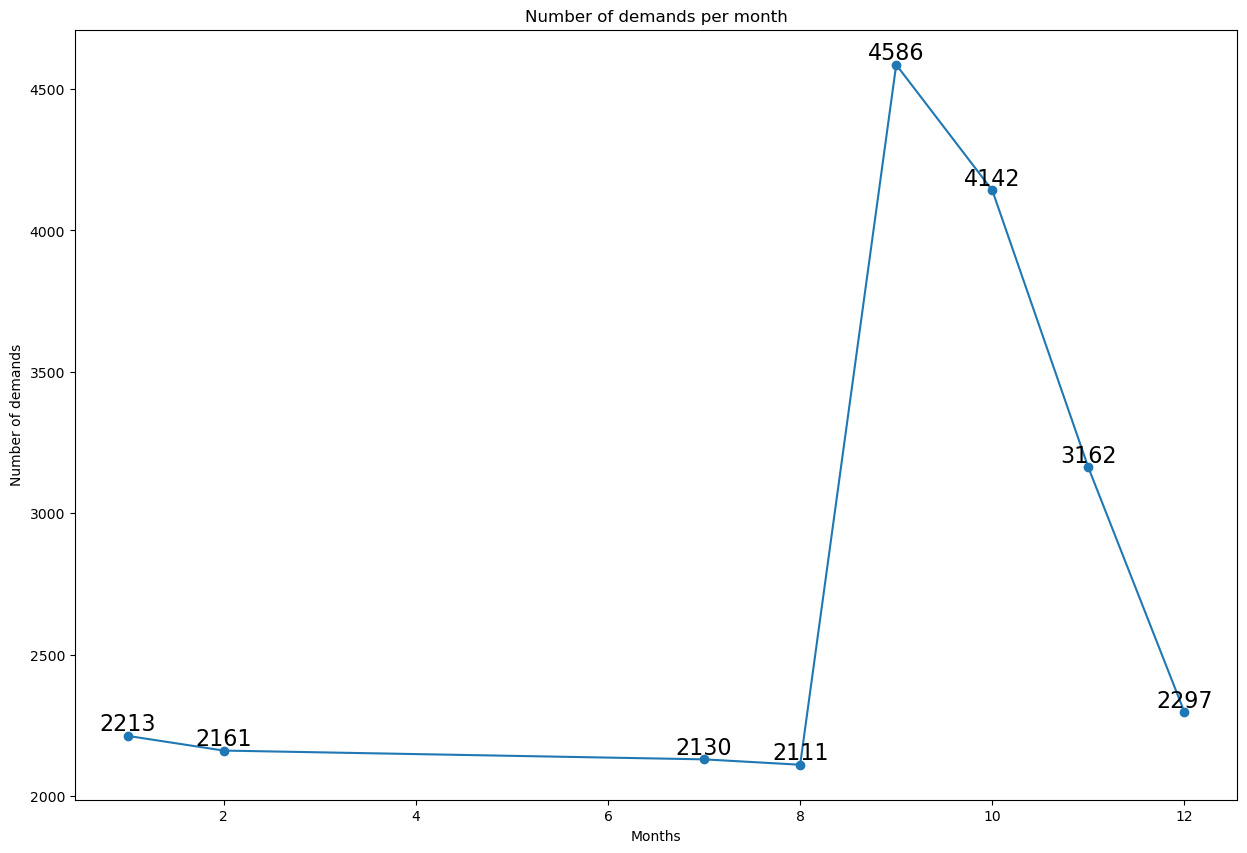

In [65]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(15,10))
plt.plot(demands.groupby('month')["walkerid"].count(), marker="o")

# Get x and y data from the plot
x_data = demands.groupby('month')['month'].count().index.to_numpy()  # Month labels (x-axis)
y_data = demands.groupby('month')["walkerid"].count().to_numpy()  # Signup counts (y-axis)

for i, (x, y) in enumerate(zip(x_data, y_data)):
  # Adjust y-position slightly for better visibility
  plt.text(x, y + 0.1, str(y), ha='center', va='bottom', fontsize=16)  # Add label with count

plt.title("Number of demands per month")
plt.xlabel("Months")
plt.ylabel("Number of demands")

plt.show()

In [66]:
demands.head(2)

,orderid,walkerid,demandtime,dogid,finishedservicecount,finishedservicecountbydogid,ispreferred,matchingid,ownerid,servicetype,walkerdistrict,walkerneighborhood,walkerdograteresponse,walkergeo,walkergroup,walkerrateresponse,month
demandtime,,,,,,,,,,,,,,,,,
2020-08-25 16:22:25.397,e44b27ec-2acb-4254-a9b4-b24bd0da7d8c,29b62d7f-61bf-4622-bd2c-af5044a398b5,2020-08-25 16:22:25.397,9dc9b910-4d9e-4d8d-acc1-2c7b36974cfa,78,2,False,31b72223-3855-49fc-a958-8e955e1c61d4,43b72967-b365-4d81-a283-4f77c5662f68,AdHoc,Kadıköy,Caferağa,"(0.0, 0)","(40.98659, 29.02385)",TypeC,"(5.0, 1)",8
2020-07-29 19:57:53.518,bbfece32-244a-4ed0-acf2-51c7ec3cb347,e8220c30-3470-44af-b7e3-3f2a063e6ecf,2020-07-29 19:57:53.518,9fa36b2d-2097-4bdd-9fe6-8742d93fbbb3,1,0,NaN,a5d2ba0c-f41f-411b-a4be-c466a99ad182,ea27cea2-0876-41bc-b8e8-5af5402b34a7,Planned,Maltepe,Çınar,"(0.0, 0)","(40.94159, 29.11359)",TypeB,"(0.0, 0)",7


In [67]:
#Walker Counts by District

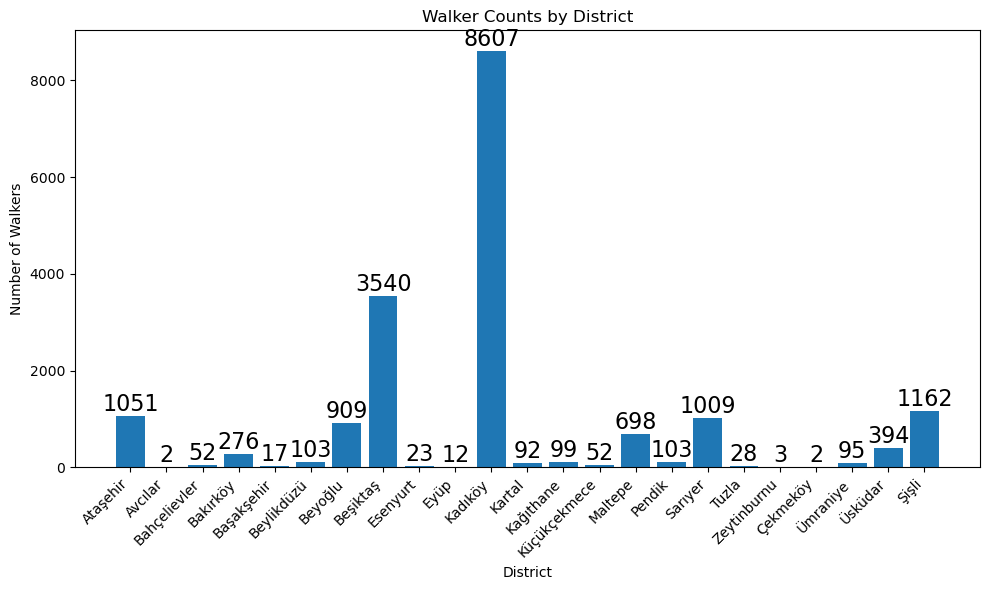

In [68]:
district_counts = walks.groupby('district')["walkerid"].count().reset_index()  # Get district counts

# Extract data for the plot
districts = district_counts['district'].to_numpy()  # Districts (x-axis)
counts = district_counts['walkerid'].to_numpy()  # Walker counts (y-axis)

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Choose the plot type (consider bar chart for counts)
plt.bar(districts, counts)  # Use bar chart for district-wise walker counts

for i, (x, y) in enumerate(zip(districts, counts)):
  # Adjust y-position slightly for better visibility
  plt.text(x, y + 0.1, str(y), ha='center', va='bottom', fontsize=16)  # Add label with count
    
# Customize the plot
plt.xlabel("District")
plt.ylabel("Number of Walkers")
plt.title("Walker Counts by District")
plt.xticks(rotation=45, ha='right')  # Rotate district labels for better readability (optional)
plt.tight_layout()

# Display the plot
plt.show()

In [69]:
#Walks count by walkingtype

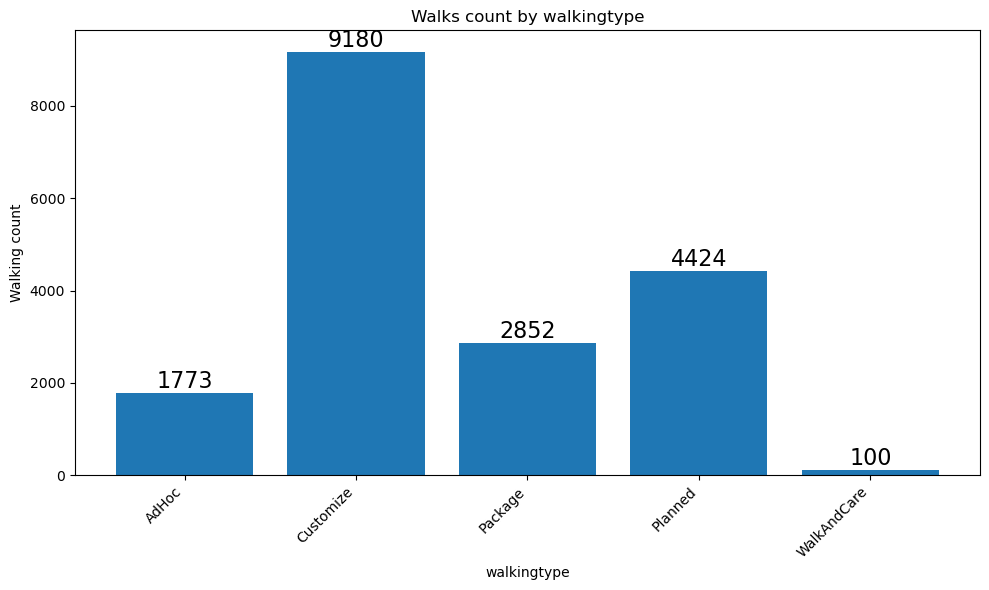

In [70]:
type_counts = walks.groupby('walkingtype')["walkerid"].count().reset_index()

# Extract data for the plot
districts = type_counts['walkingtype'].to_numpy()  # Districts (x-axis)
counts = type_counts['walkerid'].to_numpy()  # Walker counts (y-axis)

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Choose the plot type (consider bar chart for counts)
plt.bar(districts, counts)  # Use bar chart for district-wise walker counts

for i, (x, y) in enumerate(zip(districts, counts)):
  # Adjust y-position slightly for better visibility
  plt.text(x, y + 0.1, str(y), ha='center', va='bottom', fontsize=16)  # Add label with count
    
# Customize the plot
plt.xlabel("walkingtype")
plt.ylabel("Walking count")
plt.title("Walks count by walkingtype")
plt.xticks(rotation=45, ha='right')  # Rotate district labels for better readability (optional)
plt.tight_layout()

# Display the plot
plt.show()